<h1> TED talks data exploration </h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Add your code and comments below.

In [2]:
df = pd.read_csv('20221013_ted_talks.csv')

In [11]:
# Basic Data Exploration
print(df.head())
print(" ")
print(df.info())

   talk_id                            title           speaker recorded_date  \
0        1      Averting the climate crisis           Al Gore    2006-02-25   
1        7                 Simplicity sells       David Pogue    2006-02-24   
2       53              Greening the ghetto     Majora Carter    2006-02-26   
3       92  The best stats you've ever seen      Hans Rosling    2006-02-22   
4       66      Do schools kill creativity?  Sir Ken Robinson    2006-02-25   

  published_date    event  duration     views    likes  
0     2006-06-27  TED2006       957   3681537   110000  
1     2006-06-27  TED2006      1266   2012797    60000  
2     2006-06-27  TED2006      1096   3006315    90000  
3     2006-06-27  TED2006      1176  15432904   462000  
4     2006-06-27  TED2006      1151  73935964  2200000  
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5701 entries, 0 to 5700
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          ----------

I loaded the TED talks dataset containing 5,701 entries. The head() method shows me the first few rows of data, while info() reveals the data types of each column. My dataset includes talk titles, speakers, view counts, and dates stored as integers, floats, and strings.

In [8]:
print("\nSummary Stats:")
print(df.describe())


Summary Stats:
            talk_id      duration         views         likes
count   5701.000000   5701.000000  5.701000e+03  5.701000e+03
mean   26577.133135    706.021751  2.147123e+06  6.386154e+04
std    30530.857641    519.196825  3.711874e+06  1.098655e+05
min        1.000000     60.000000  4.560000e+02  1.300000e+01
25%     1660.000000    354.000000  6.859920e+05  2.000000e+04
50%    10368.000000    679.000000  1.405696e+06  4.200000e+04
75%    51783.000000    924.000000  2.189406e+06  6.500000e+04
max    98843.000000  20404.000000  7.393596e+07  2.200000e+06


I calculated basic statistics using describe(). The average TED talk is 13 minutes long. View counts vary widely, with some talks receiving many more views than others. This variation suggests that some talks resonate more strongly with viewers.

In [9]:
# Check for missing values
print("\nMissing Values:")
print(df.isna().sum())


Missing Values:
talk_id           0
title             0
speaker           1
recorded_date     2
published_date    0
event             1
duration          0
views             0
likes             0
dtype: int64


I checked for missing data using isna(). Most columns are complete, with very few missing values. This completeness means I can proceed with my analysis without extensive data cleaning.

In [12]:
# Value counts for categorical columns
print("\nDistribution of talks by main speaker:")
print(df['speaker'].value_counts().head())


Distribution of talks by main speaker:
speaker
Alex Gendler        47
Iseult Gillespie    37
Matt Walker         18
Alex Rosenthal      15
Elizabeth Cox       15
Name: count, dtype: int64


I counted how many talks each speaker gave. Some speakers have given multiple talks, which tells me they are likely experts or influential voices in their fields.

In [14]:
# New column
df['duration_hours'] = df['duration'] / 60
print(df['duration_hours'])

0       15.950000
1       21.100000
2       18.266667
3       19.600000
4       19.183333
          ...    
5696     6.500000
5697     9.066667
5698     3.500000
5699     5.533333
5700    12.383333
Name: duration_hours, Length: 5701, dtype: float64


I created a new column that converts talk duration from minutes to hours. This conversion helps me understand talk lengths in a more familiar unit of measurement.

In [15]:
# Sort talks by views
most_viewed = df.sort_values('views', ascending=False).head()
print("\nTop 5 most viewed talks:")
print(most_viewed[['title', 'speaker', 'views']]) 


Top 5 most viewed talks:
                                           title           speaker     views
4                    Do schools kill creativity?  Sir Ken Robinson  73935964
1339    Your body language may shape who you are         Amy Cuddy  66163329
2150  Inside the mind of a master procrastinator         Tim Urban  63543965
672             How great leaders inspire action       Simon Sinek  60129500
831                   The power of vulnerability       Brené Brown  59438598


I sorted the talks by view count to find the most popular ones. This sorting reveals which topics and speakers have drawn the largest audiences.

In [16]:
# Boolean indexing 
popular_talks = df[df['views'] > 1_000_000]
print(f"\nNumber of talks with over 1M views: {len(popular_talks)}")


Number of talks with over 1M views: 3730


I used Boolean indexing to find talks with over 1 million views. This count shows me how many talks reached a large audience.

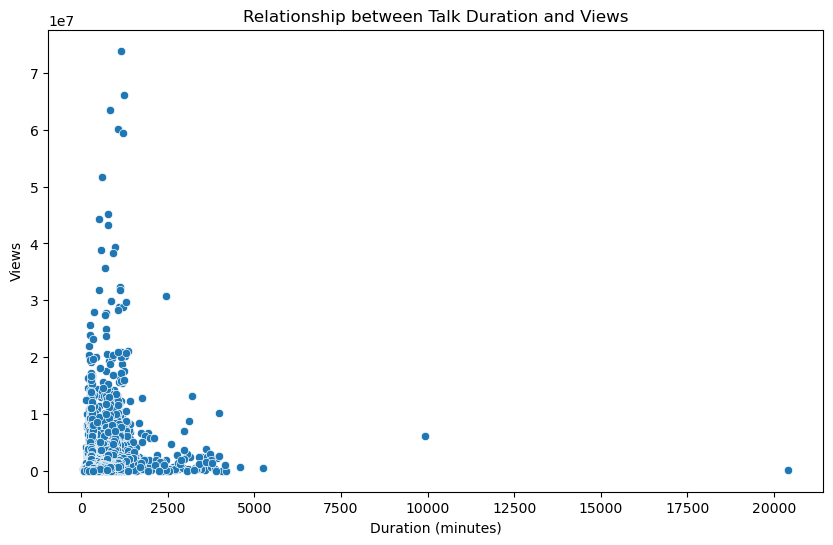

In [17]:
# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='duration', y='views')
plt.title('Relationship between Talk Duration and Views')
plt.xlabel('Duration (minutes)')
plt.ylabel('Views')
plt.show()

I created a scatter plot to see if talk length relates to view count. This visualization helps me spot any patterns between a talk's duration and its popularity.

In [18]:
df['title_length'] = df['title'].apply(lambda x: len(str(x)))
print(df['title_length'])

0       27
1       16
2       19
3       31
4       27
        ..
5696    25
5697    45
5698    46
5699    45
5700    46
Name: title_length, Length: 5701, dtype: int64


I used a lambda function to measure each title's length. This measurement lets me see if shorter or longer titles attract more views.


In [19]:
# Subset of data (talks from 2020 onwards)
df['published_date'] = pd.to_datetime(df['published_date'])  # Convert to datetime
recent_talks = df[df['published_date'] >= '2020-01-01']

I created a subset of talks from 2020 onwards. This filtering shows me recent trends in TED talks.


In [ ]:
df.to_csv('processed_ted_talks.csv', index=False)

I saved my processed dataset to a CSV file for future use.